## Import thư viện

In [1]:
# Thư viện đọc file và chuyển kiểu
import pandas as pd
import numpy as np

# Đổi kiểu dữ liệu datetime
import datetime as dt

# Import các thư viện train
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import sklearn để tính toán các giá trị cũng như scaled dataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler

# Thư viện trực quan hóa dữ liệu
import matplotlib.pyplot as plt
%matplotlib inline

## Đọc dữ liệu từ file

In [2]:
df = pd.read_csv('../../Dataset/CTLT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,30.860001,31.260000,30.240000,30.910000,30.910000,1201700
1,2019-01-03,30.660000,30.660000,29.290001,29.840000,29.840000,1149900
2,2019-01-04,30.049999,31.360001,29.940001,31.080000,31.080000,3530400
3,2019-01-07,31.020000,32.180000,30.850000,32.000000,32.000000,1063400
4,2019-01-08,32.340000,33.060001,32.150002,32.790001,32.790001,1391000
...,...,...,...,...,...,...,...
1114,2023-06-06,37.910000,39.049999,37.580002,38.820000,38.820000,2261700
1115,2023-06-07,39.160000,40.029999,38.250000,39.959999,39.959999,4382500
1116,2023-06-08,39.700001,39.840000,36.750000,39.000000,39.000000,9705500
1117,2023-06-09,39.250000,40.110001,38.480000,38.810001,38.810001,4493800


In [3]:
# Chuyển đổi kiểu dữ liệu của cột Date sang datetime64
df['Date'] = pd.to_datetime(df['Date'])

# Đặt cột Date làm index của DataFrame
df.set_index('Date', inplace=True)

In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,30.860001,31.260000,30.240000,30.910000,30.910000,1201700
2019-01-03,30.660000,30.660000,29.290001,29.840000,29.840000,1149900
2019-01-04,30.049999,31.360001,29.940001,31.080000,31.080000,3530400
2019-01-07,31.020000,32.180000,30.850000,32.000000,32.000000,1063400
2019-01-08,32.340000,33.060001,32.150002,32.790001,32.790001,1391000
...,...,...,...,...,...,...
2023-06-06,37.910000,39.049999,37.580002,38.820000,38.820000,2261700
2023-06-07,39.160000,40.029999,38.250000,39.959999,39.959999,4382500
2023-06-08,39.700001,39.840000,36.750000,39.000000,39.000000,9705500


## Phân tích dữ liệu

### Trực quan hóa dữ liệu

## Xây dựng mô hình

In [5]:
# Select column 'Close'
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

In [6]:
#  Scaler data
scaler = MinMaxScaler(feature_range = (0, 1))
df_scaled = scaler.fit_transform(np.array(df_Close))

### Chia tập train, test, validation

In [7]:
# Chia dữ liệu thành tập train, validation và test theo tỉ lệ 7:2:1
train_size = int(len(df_scaled) * 0.7)
val_size = int(len(df_scaled) * 0.2)
test_size = len(df_scaled) - train_size - val_size

train_data = df_scaled[0 : train_size, :]
val_data = df_scaled[train_size : train_size + val_size, :]
test_data = df_scaled[train_size + val_size : len(df_scaled), :]

In [8]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [9]:
# Thêm dữ liệu cho tập train, validation và test
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


### Xây dựng mô hình Deep Feedforward Neural Network

In [10]:
# Tạo một đối tượng Sequential model
model = Sequential()

model.add(Dense(128, input_dim=time_step, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')  

### Biên dịch mô hình

### Huấn luyện mô hình

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

Epoch 1/100


24/24 [==============================] - 1s 11ms/step - loss: 0.0771 - val_loss: 0.0071
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0056
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.0040
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 9.5566e-04 - val_loss: 0.0029
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 7.9626e-04 - val_loss: 0.0023
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 7.5905e-04 - val_loss: 0.0024
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 7.7297e-04 - val_loss: 0.0022
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 7.5142e-04 - val_loss: 0.0021


### Vẽ đồ thị loss trên tập train và tập validation

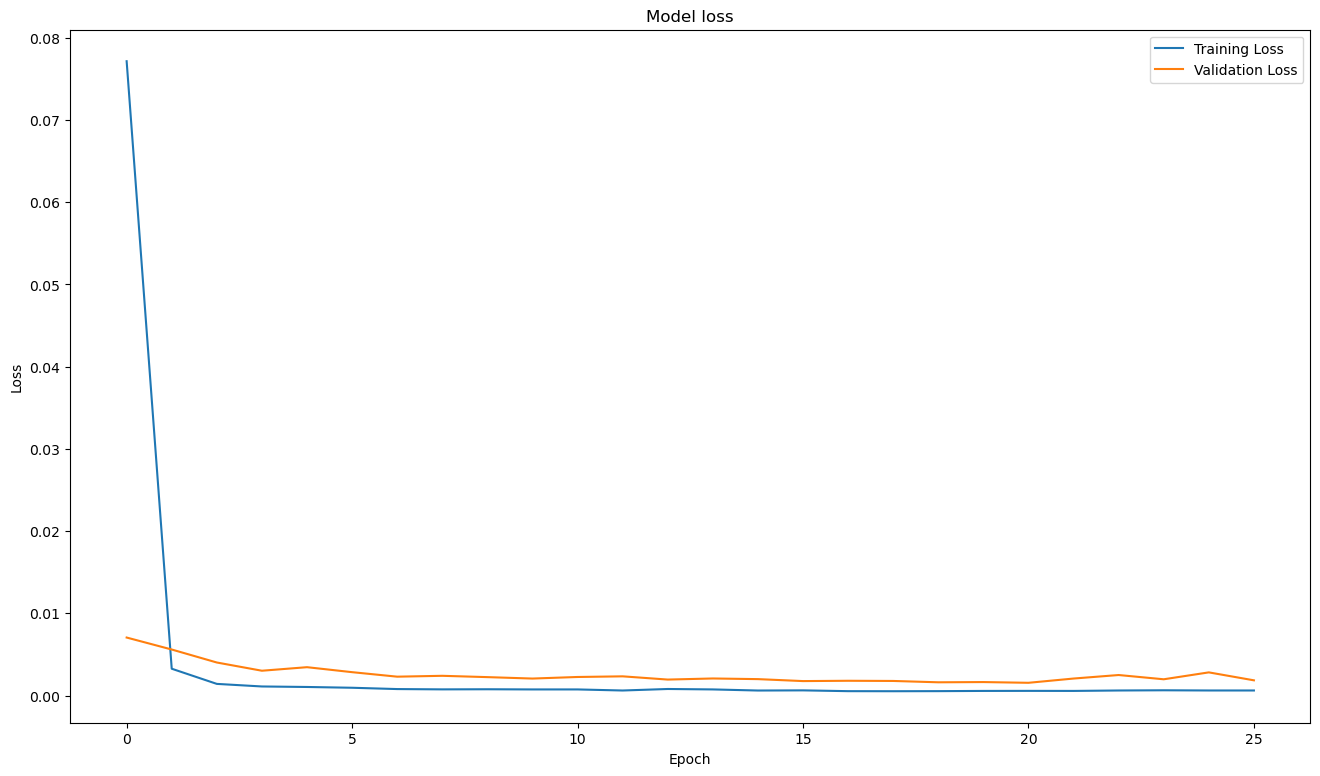

In [13]:
plt.figure(figsize=(16, 9))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

<h2>Dự đoán CLose Price trên tập test và validation

In [14]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

6/6 [==============================] - 0s 2ms/step


In [15]:
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [16]:
mae = mean_absolute_error(y_val, y_pred_val)
mape = mean_absolute_percentage_error(y_val, y_pred_val)
rmse = mean_squared_error(y_val, y_pred_val, squared=False)
print(mae)
print(mape)
print(rmse)

88.68805930282116
210.76757492870942
91.50377748578396


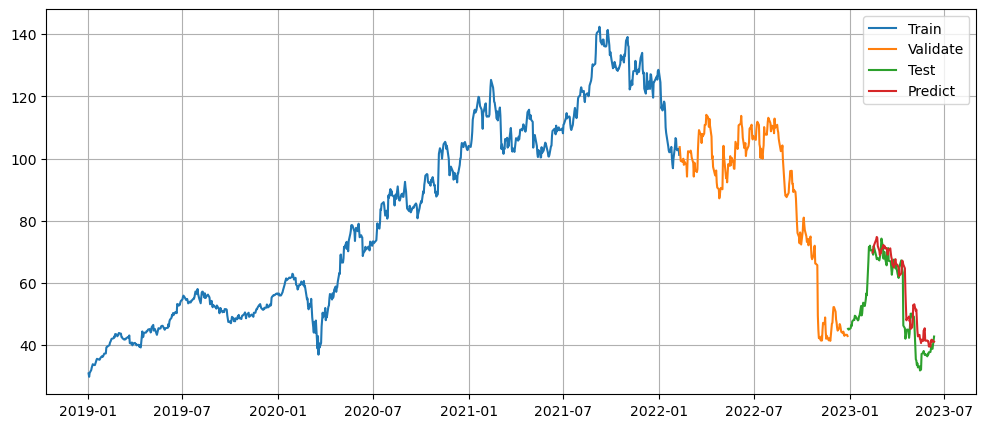

In [17]:
# Visualization
plt.figure(figsize=(12, 5))

plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

plt.plot(df.index[train_size : train_size + val_size], scaler.inverse_transform(val_data))

plt.plot(df.index[train_size + val_size : ], scaler.inverse_transform(test_data))

plt.plot(df.index[train_size + val_size + time_step + 1: ], y_pred)

plt.legend(['Train', 'Validate', 'Test', 'Predict', 'Predict30days'])
plt.grid()
plt.show()

In [21]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
x_input=x_input.reshape((1, n_steps, 1))

i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


ValueError: cannot reshape array of size 163 into shape (1,100,1)